# Renewable Energy Optimization

<div class="usecase-title">Renewable Energy Optimization</div>

<div class="usecase-authors"><b>Authored by: </b> Sinan Kilci</div>

<div class="usecase-duration"><b>Duration:</b> 60 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate </div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Geographical Coordinate Handling, Folium Maps, Predictive Data Wrangling </div>
</div>

The main goal of this project is to use historical environmental data to improve the installation and operation of renewable energy sources like wind turbines and solar panels. The aim is to make energy production more efficient and sustainable by studying environmental factors that affect energy production. The results will help us understand the best places to put renewable energy sources and how to operate them more effectively, using detailed environmental information to boost efficiency and sustainability.

User Stories:

- *As a city planner, I want to leverage environmental data to determine the best locations for wind turbines and solar panels in order to maximize energy production and reduce costs.*
- *As a renewable energy company, I want to use predictive models that estimate energy production potential in various locations to make informed decisions about future installations.*
- *As a citizen, I want to benefit from a sustainable energy system that reduces carbon emissions and promotes environmental well-being in my city.*

At the end of this use case you will:
- Have a clear understanding of how environmental data can be leveraged to optimize the placement and operation of renewable energy sources like wind turbines and solar panels
- Access to visualizations that effectively communicate the trends and patterns found in the data, providing an intuitive grasp of complex environmental factors
- Explore detailed data analysis and wrangling techniques that refine raw data into actionable insights, highlighting key variables affecting renewable energy efficiency and sustainability
- Be exposed to predictive models that forecast energy production potential based on historical environment data, offering strategic insights for future planning and investment.

# Introduction

<div class="usecase-section-header">Optimizing Renewable Energy Deployment Using Environmental Sensor Data</div>

In recent years, the global need for renewable energy has been increased as we strive to reduce carbon emissions and reduce the effects of climate change. Renewable energy sources, such as wind turbines and solar panels, play a critical role in this transition. However, the efficiency and effectiveness of these installations are heavily influenced by environmental conditions. Placing a wind turbine in an area with inconsistent wind patterns or a solar panel where sunlight is obstructed can lead to weak performance and increased costs.

This study aims to address these challenges by leveraging detailed environmental data from microclimate and meshed sensor networks. By analyzing factors such as wind speed, solar radiation, temperature, and humidity, we can identify optimal locations and operational strategies for renewable energy installations. The goal is to maximize energy generation, improve cost-efficiency, and reduce environmental impact.

The datasets used in this study are gathered from City of Melbourne Open Data Platform (https://data.melbourne.vic.gov.au) and provide extensive insights into local environmental conditions in Melbourne City. They include:
- Weather Stations Data (ATMOS 41): Historical data collected by weather stations installed in Argyle Square, capturing wind speed, solar radiation, and atmospheric conditions. This information is crucial for assessing site suitability for renewable energy projects.
- Microclimate Sensors Data: Contains climate readings from sensors located within the city, updated every fifteen minutes. This dataset includes ambient air temperature, relative humidity, atmospheric pressure, wind speed and direction, gust wind speed, particulate matter 2.5, particulate matter 10, and noise. It is essential for understanding microclimate variations throughout the day.

# Importing and Loading Data

##### Importing the required libraries

In [ ]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

##### Function to request the datasets from their sources (APIv2.1)

In [ ]:
def request_data(dataset_id, format='csv', delimiter=';', api_key=None):
  base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
  url = f'{base_url}{dataset_id}/exports/{format}'

  params = {
      'select': '*',
      'limit': -1,
      'lang': 'en',
      'timezone': 'UTC'
  }

  headers = {}
  if api_key:
    headers['Authorization'] = f'Bearer {api_key}'

  try:
    response = requests.get(url, params=params, headers=headers, timeout=10)
    response.raise_for_status()

    if format == 'csv':
      content = response.content.decode('utf-8')
      df = pd.read_csv(StringIO(content), delimiter=delimiter)
      return df
    else:
      raise ValueError(f"Unsupported format: {format}")

  except requests.exceptions.RequestException as e:
    raise Exception(f'API request failed: {e}')

##### Loading datasets

In [ ]:
microclimate_sensors_data = request_data('microclimate-sensors-data', format='csv')
meshed_sensor_type_1 = request_data('meshed-sensor-type-1', format='csv')

In [ ]:
microclimate_sensors_data.head()

,device_id,received_at,sensorlocation,latlong,minimumwinddirection,averagewinddirection,maximumwinddirection,minimumwindspeed,averagewindspeed,gustwindspeed,airtemperature,relativehumidity,atmosphericpressure,pm25,pm10,noise
0,ICTMicroclimate-09,2024-07-17T15:33:32+00:00,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,"-37.8223306, 144.9521696",0.0,300.0,359.0,0.0,0.9,3.5,8.7,86.3,1013.1,1.0,4.0,63.1
1,ICTMicroclimate-03,2024-07-17T15:06:13+00:00,CH1 rooftop,"-37.8140348, 144.96728",0.0,308.0,349.0,0.0,0.4,1.0,8.5,99.0,1008.7,3.0,5.0,69.7
2,ICTMicroclimate-07,2024-07-17T15:21:33+00:00,Tram Stop 7C - Melbourne Tennis Centre Precinc...,"-37.8222341, 144.9829409",0.0,262.0,354.0,0.0,0.4,1.6,9.0,85.0,1016.1,0.0,0.0,55.3
3,ICTMicroclimate-08,2024-07-17T15:40:34+00:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,339.0,359.0,0.0,0.9,4.3,9.0,83.9,1014.1,1.0,1.0,60.6
4,ICTMicroclimate-02,2024-07-17T15:42:47+00:00,101 Collins St L11 Rooftop,"-37.814604, 144.9702991",7.0,118.0,261.0,1.4,2.1,4.1,9.0,96.7,1009.4,8.0,11.0,69.0


In [ ]:
meshed_sensor_type_1.head()

,dev_id,time,rtc,battery,solarpanel,command,solar,precipitation,strikes,windspeed,winddirection,gustspeed,vapourpressure,atmosphericpressure,relativehumidity,airtemp,lat_long,sensor_name
0,atmos41-32fc,2021-05-14T18:11:23+00:00,10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,253.5,10.74,0.93,100.70,88.0,7.8,"-37.8022141, 144.9656262",Weather Station
1,atmos41-32fc,2022-05-03T10:25:31+00:00,17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,158.5,1.14,1.25,100.91,68.0,16.2,"-37.8022141, 144.9656262",Weather Station
2,atmos41-32fc,2022-05-03T21:42:23+00:00,17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,7.7,2.43,1.21,100.83,75.0,14.0,"-37.8022141, 144.9656262",Weather Station
3,atmos41-32fc,2022-05-04T00:42:43+00:00,17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,9.9,3.22,1.17,100.91,76.0,13.4,"-37.8022141, 144.9656262",Weather Station
4,atmos41-32fc,2021-05-15T07:55:22+00:00,10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,253.8,8.07,0.78,101.63,56.0,11.7,"-37.8022141, 144.9656262",Weather Station


# Data Wrangling

#### Dataset cleaning and tidying

##### Converting time related columns to datetime

In [ ]:
microclimate_sensors_data['received_at'] = pd.to_datetime(microclimate_sensors_data['received_at'], errors='coerce', utc=True)
meshed_sensor_type_1['time'] = pd.to_datetime(meshed_sensor_type_1['time'], errors='coerce', utc=True)

##### Checking for missing values

In [ ]:
print("Total rows in microclimate_sensors_data:", len(microclimate_sensors_data))
print("Total rows in meshed_sensor_type_1:", len(meshed_sensor_type_1))

print("Missing Values in Microclimate Sensors Data:\n", microclimate_sensors_data.isnull().sum())
print("Missing Values in Meshed Sensor Type 1:\n", meshed_sensor_type_1.isnull().sum())

Total rows in microclimate_sensors_data: 87663
Total rows in meshed_sensor_type_1: 123476
Missing Values in Microclimate Sensors Data:
 device_id                   0
received_at                 0
sensorlocation           4426
latlong                  4426
minimumwinddirection    10916
averagewinddirection      188
maximumwinddirection    10916
minimumwindspeed        10916
averagewindspeed          188
gustwindspeed           10916
airtemperature            188
relativehumidity          188
atmosphericpressure       188
pm25                     7167
pm10                     7167
noise                    7167
dtype: int64
Missing Values in Meshed Sensor Type 1:
 dev_id                    0
time                      0
rtc                    2677
battery                2088
solarpanel             2196
command                2129
solar                  2783
precipitation          2784
strikes                2784
windspeed              2199
winddirection          2200
gustspeed             

##### Sorting the data by time

In [ ]:
microclimate_sensors_data.sort_values('received_at', inplace=True)
meshed_sensor_type_1.sort_values('time', inplace=True)

##### Extracting time-based features

In [ ]:
microclimate_sensors_data['hour'] = microclimate_sensors_data['received_at'].dt.hour
microclimate_sensors_data['day'] = microclimate_sensors_data['received_at'].dt.day
microclimate_sensors_data['month'] = microclimate_sensors_data['received_at'].dt.month

meshed_sensor_type_1['hour'] = meshed_sensor_type_1['time'].dt.hour
meshed_sensor_type_1['day'] = meshed_sensor_type_1['time'].dt.day
meshed_sensor_type_1['month'] = meshed_sensor_type_1['time'].dt.month

##### Handling the missing values

In [ ]:
# Identification of existing device_id to sensorlocation and latlong mappings
location_mapping = microclimate_sensors_data.dropna(subset=['sensorlocation']).set_index('device_id')['sensorlocation'].to_dict()
latlong_mapping = microclimate_sensors_data.dropna(subset=['latlong']).set_index('device_id')['latlong'].to_dict()

# Filling missing sensorlocation values based on device_id
microclimate_sensors_data['sensorlocation'] = microclimate_sensors_data.apply(
    lambda row: location_mapping.get(row['device_id'], row['sensorlocation']), axis=1
)

# Filling missing latlong values based on device_id
microclimate_sensors_data['latlong'] = microclimate_sensors_data.apply(
    lambda row: latlong_mapping.get(row['device_id'], row['latlong']), axis=1
)

# Checking if the missing values in sensorlocation and latlong are filled
print("Missing Values in Sensor Location after filling:\n", microclimate_sensors_data['sensorlocation'].isnull().sum())
print("Missing Values in latlong after filling:\n", microclimate_sensors_data['latlong'].isnull().sum())
print("If there are missing values still after the filling, they will be removed from the data.")

# The dataset has been updated with 2 new sensors added.
# These sensors don't have location info and without location info, those sensors won't be useful for my analysis.
microclimate_sensors_data.dropna(subset=['sensorlocation'], inplace=True)
microclimate_sensors_data.dropna(subset=['latlong'], inplace=True)

# Since PM25 and PM10 (particles in air) can't be predicted (no other logical variable to predict),
# rows with missing values will be purged from the dataset
microclimate_sensors_data.dropna(subset=['pm10'], inplace=True)
microclimate_sensors_data.dropna(subset=['pm25'], inplace=True)

# Reindexing the DataFrame to reset the index
microclimate_sensors_data.reset_index(drop=True, inplace=True)

# Dropping rows where all specified wind-related columns are 0
columns_to_check = [
    'minimumwinddirection', 'averagewinddirection', 'maximumwinddirection',
    'minimumwindspeed', 'averagewindspeed', 'gustwindspeed'
]

microclimate_sensors_data = microclimate_sensors_data[
    ~(microclimate_sensors_data[columns_to_check] == 0).all(axis=1)
].copy()

microclimate_sensors_data.dropna(subset=['airtemperature', 'relativehumidity', 'atmosphericpressure'], inplace=True)
meshed_sensor_type_1.dropna(inplace=True)

Missing Values in Sensor Location after filling:
 3623
Missing Values in latlong after filling:
 3623
If there are missing values still after the filling, they will be removed from the data.


##### Dropping unnecessary columns

In [ ]:
microclimate_sensors_data.drop(columns=['noise', 'minimumwinddirection', 'maximumwinddirection'], inplace=True)

##### Handling and checking the data in empty fields in Microclimate dataset

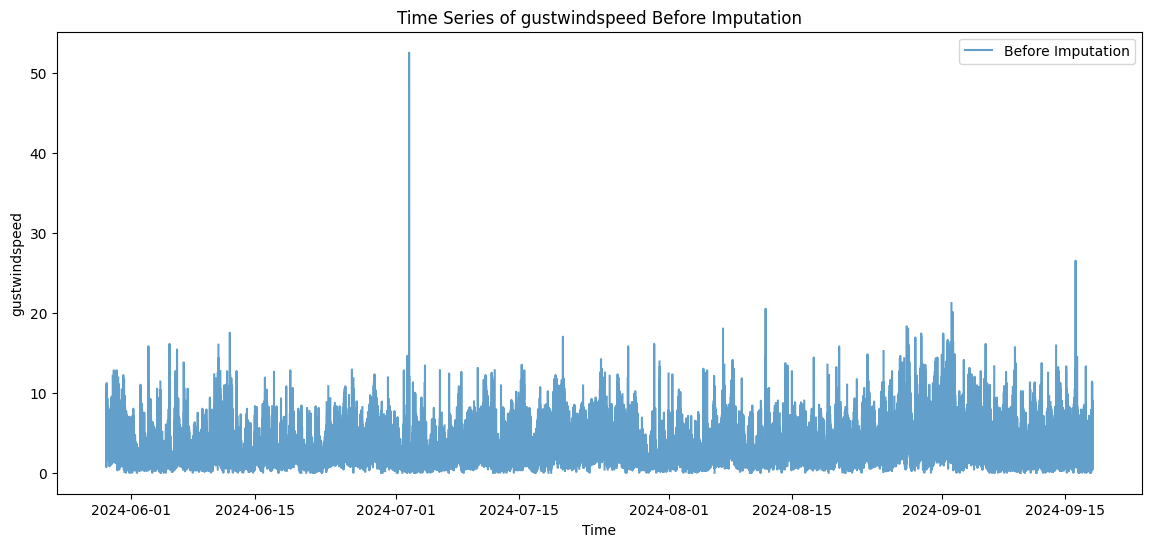

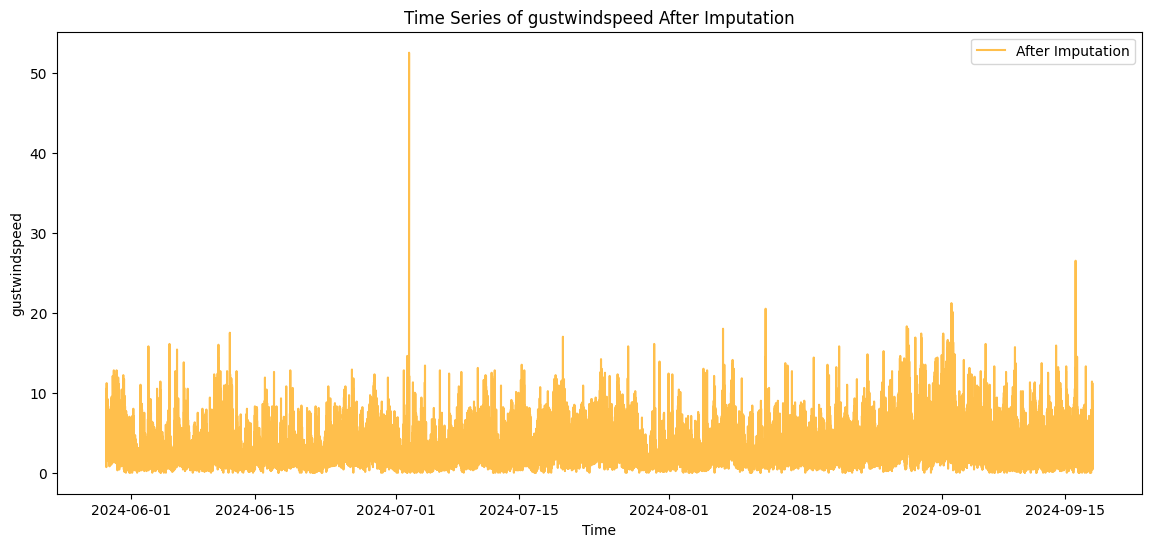

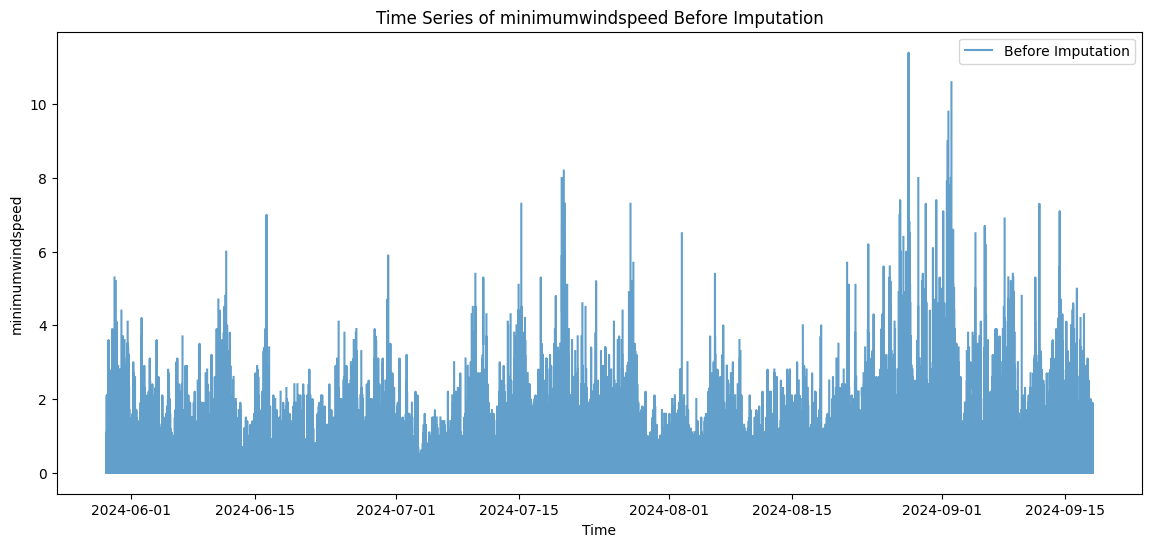

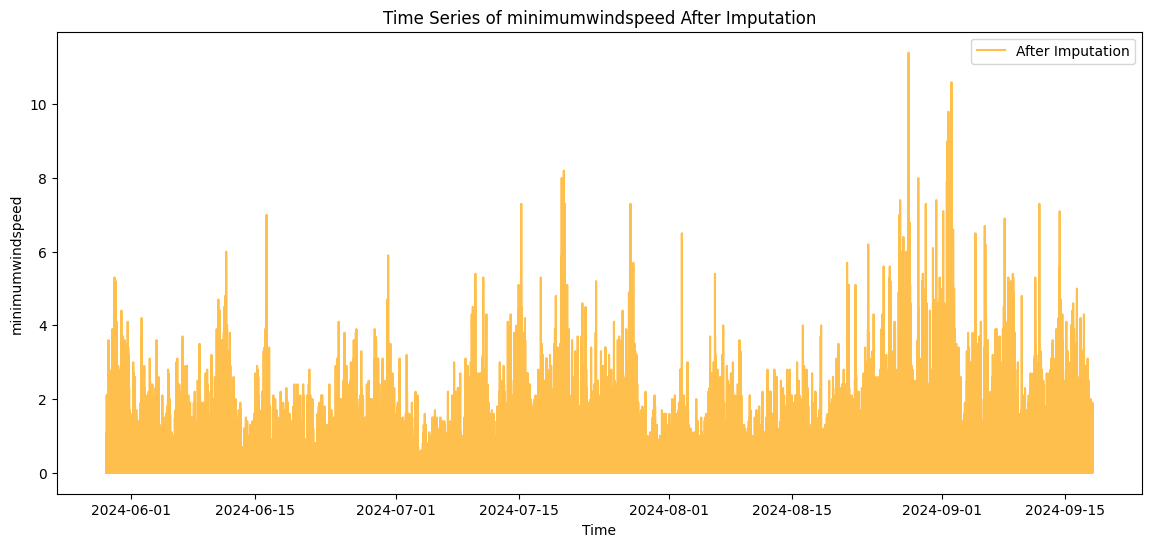

In [ ]:
def impute_and_plot_knn(target_column, feature_columns, data):
  plt.figure(figsize=(14, 6))
  plt.plot(data['received_at'], data[target_column], label='Before Imputation', alpha=0.7)
  plt.title(f'Time Series of {target_column} Before Imputation')
  plt.xlabel('Time')
  plt.ylabel(target_column)
  plt.legend()
  plt.show()

  complete_data = data.dropna(subset=[target_column])
  missing_data = data[data[target_column].isnull()]

  X = complete_data[feature_columns]
  y = complete_data[target_column]

  imputer = SimpleImputer(strategy='mean')
  X_imputed = imputer.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

  # KNN regression model
  knn_model = KNeighborsRegressor(n_neighbors=5)
  knn_model.fit(X_train, y_train)

  missing_X = missing_data[feature_columns]
  missing_X_imputed = imputer.transform(missing_X)

  predicted_values = knn_model.predict(missing_X_imputed)

  # Ensuring non-negative predictions for wind speed
  predicted_values = np.maximum(predicted_values, 0)

  data.loc[missing_data.index, target_column] = predicted_values

  plt.figure(figsize=(14, 6))
  plt.plot(data['received_at'], data[target_column], label='After Imputation', alpha=0.7, color='orange')
  plt.title(f'Time Series of {target_column} After Imputation')
  plt.xlabel('Time')
  plt.ylabel(target_column)
  plt.legend()
  plt.show()

# Defining target variables and their respective features
targets = ['gustwindspeed', 'minimumwindspeed']
features = ['hour', 'day', 'month', 'averagewindspeed', 'airtemperature', 'relativehumidity', 'atmosphericpressure']

for target in targets:
  impute_and_plot_knn(target, features, microclimate_sensors_data)

##### I identified some of the average wind speed values are less then minimum wind speed. I'm using predictive data wrangling method (KNN) to fix that.

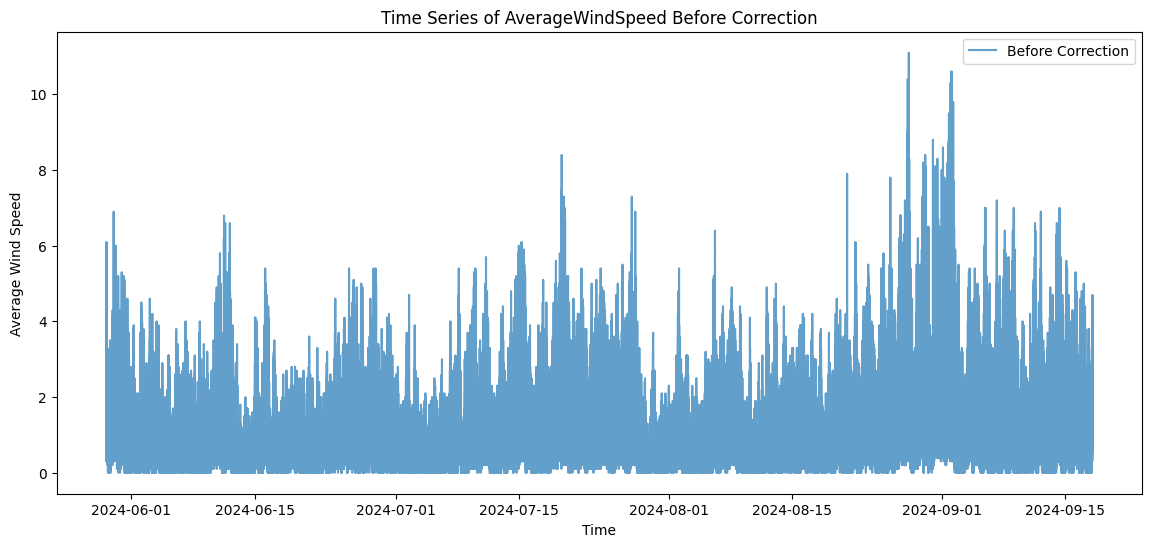

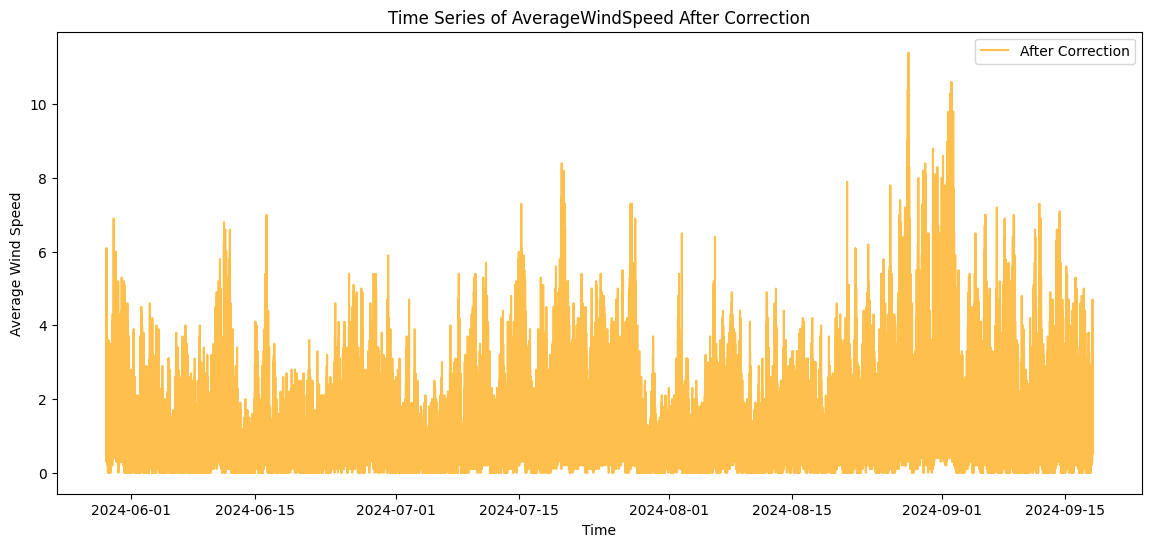

In [ ]:
# Plot before correction
plt.figure(figsize=(14, 6))
plt.plot(microclimate_sensors_data['received_at'], microclimate_sensors_data['averagewindspeed'], label='Before Correction', alpha=0.7)
plt.title('Time Series of AverageWindSpeed Before Correction')
plt.xlabel('Time')
plt.ylabel('Average Wind Speed')
plt.legend()
plt.show()

# Identification of rows where AverageWindSpeed is less than MinimumWindSpeed
incorrect_avg_wind = microclimate_sensors_data[microclimate_sensors_data['averagewindspeed'] < microclimate_sensors_data['minimumwindspeed']]

complete_data = microclimate_sensors_data.drop(incorrect_avg_wind.index)

# Defining features and target
features = ['hour', 'day', 'month', 'minimumwindspeed', 'gustwindspeed', 'airtemperature', 'relativehumidity', 'atmosphericpressure']
X = complete_data[features]
y = complete_data['averagewindspeed']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Training the KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_imputed, y)

missing_X = incorrect_avg_wind[features]
missing_X_imputed = imputer.transform(missing_X)
predicted_values = knn_model.predict(missing_X_imputed)

# Ensuring predictions are within bounds
predicted_values = np.clip(predicted_values, incorrect_avg_wind['minimumwindspeed'], incorrect_avg_wind['gustwindspeed'])

microclimate_sensors_data.loc[incorrect_avg_wind.index, 'averagewindspeed'] = predicted_values

# Plot after correction
plt.figure(figsize=(14, 6))
plt.plot(microclimate_sensors_data['received_at'], microclimate_sensors_data['averagewindspeed'], label='After Correction', alpha=0.7, color='orange')
plt.title('Time Series of AverageWindSpeed After Correction')
plt.xlabel('Time')
plt.ylabel('Average Wind Speed')
plt.legend()
plt.show()

##### Checking one last time for the missing values

In [ ]:
print("Missing Values in Microclimate Sensors Data:\n", microclimate_sensors_data.isnull().sum())
print("Missing Values in Meshed Sensor Type 1:\n", meshed_sensor_type_1.isnull().sum())

Missing Values in Microclimate Sensors Data:
 device_id               0
received_at             0
sensorlocation          0
latlong                 0
averagewinddirection    0
minimumwindspeed        0
averagewindspeed        0
gustwindspeed           0
airtemperature          0
relativehumidity        0
atmosphericpressure     0
pm25                    0
pm10                    0
hour                    0
day                     0
month                   0
dtype: int64
Missing Values in Meshed Sensor Type 1:
 dev_id                 0
time                   0
rtc                    0
battery                0
solarpanel             0
command                0
solar                  0
precipitation          0
strikes                0
windspeed              0
winddirection          0
gustspeed              0
vapourpressure         0
atmosphericpressure    0
relativehumidity       0
airtemp                0
lat_long               0
sensor_name            0
hour                   0
day      

##### Removing outilers

In [ ]:
# After seeing the plots, I decided to change the threshold from 3.0 to 3.5
def remove_outliers_zscore(df, columns, z_threshold=3.5):
  for column in columns:
    mean_col = df[column].mean()
    std_col = df[column].std()

    z_scores = (df[column] - mean_col) / std_col

    df = df[(z_scores > -z_threshold) & (z_scores < z_threshold)]
  return df

# Columns to check for outliers in microclimate data
columns_to_check_microclimate_sensors_data = [
    'airtemperature', 'relativehumidity', 'atmosphericpressure',
    'minimumwindspeed', 'averagewindspeed', 'gustwindspeed',
    'pm10', 'pm25'
]

# Columns to check for outliers in meshed sensor data
columns_to_check_meshed_sensor_type_1 = [
    'solar', 'windspeed', 'gustspeed',
    'vapourpressure', 'atmosphericpressure', 'relativehumidity',
    'airtemp'
]

# Removing outliers from the specified columns
wrangled_microclimate_sensors_data = remove_outliers_zscore(microclimate_sensors_data, columns_to_check_microclimate_sensors_data)
wrangled_meshed_sensor_type_1 = remove_outliers_zscore(meshed_sensor_type_1, columns_to_check_meshed_sensor_type_1)

print("Number of rows after removing outliers from Microclimate data:", len(wrangled_microclimate_sensors_data))
print("Number of rows after removing outliers from Meshed Sensor data:", len(wrangled_meshed_sensor_type_1))

Number of rows after removing outliers from Microclimate data: 72029
Number of rows after removing outliers from Meshed Sensor data: 117084


##### Final visualizations after all the data wrangling phase.

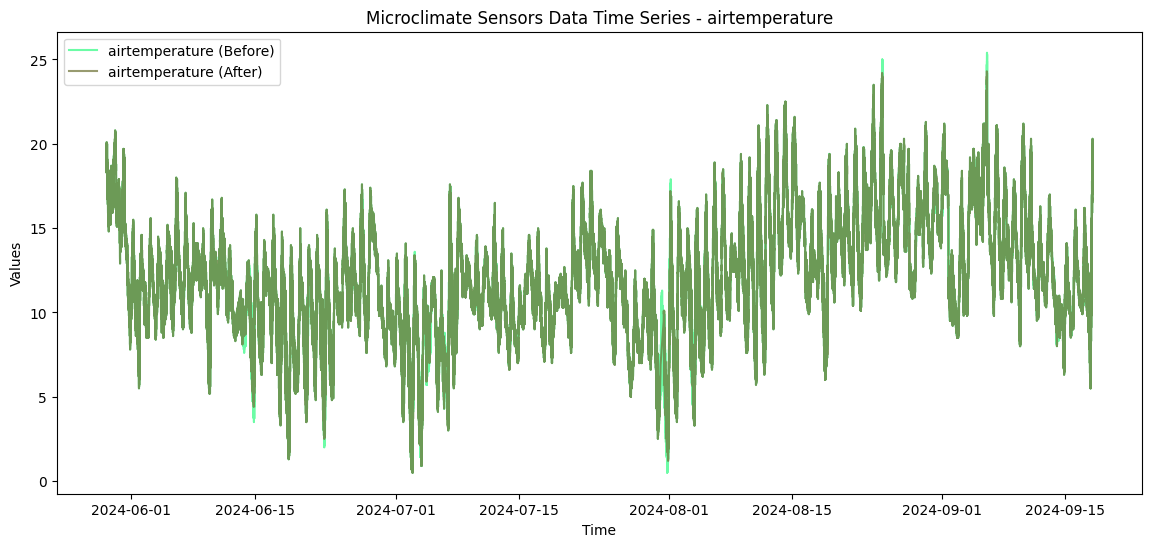

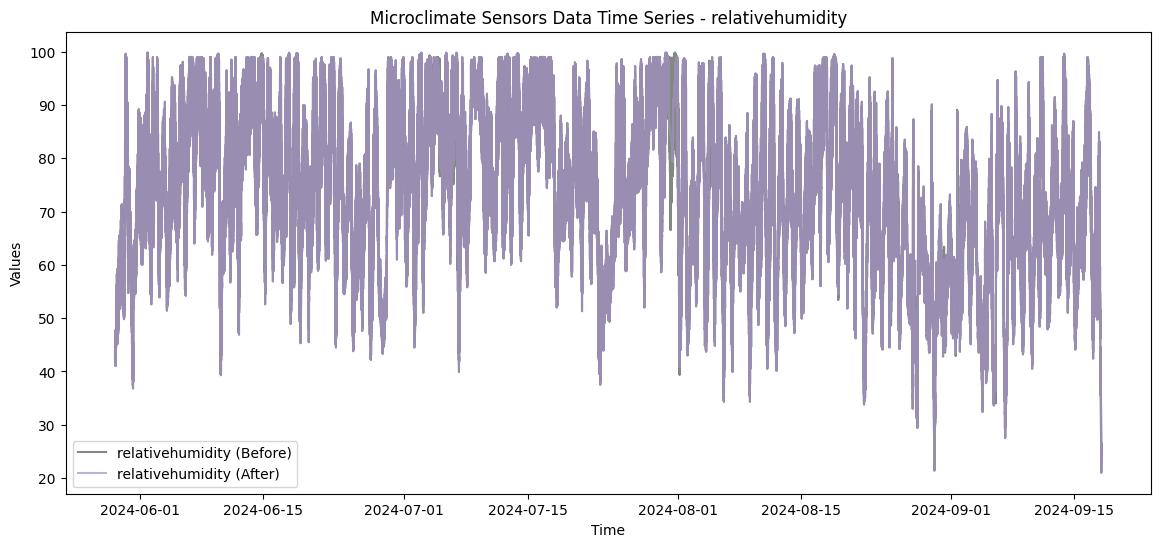

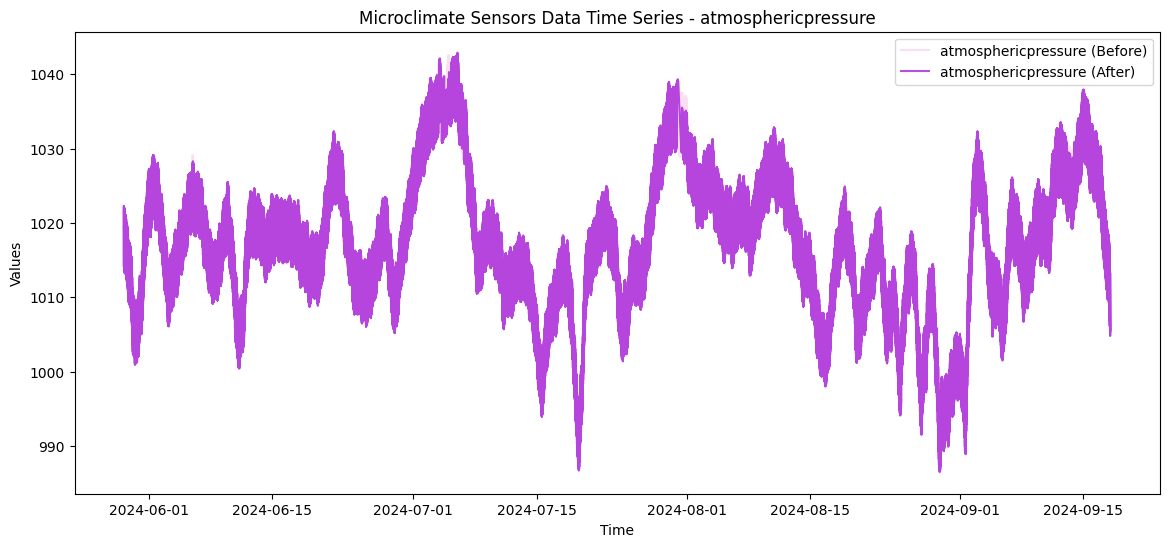

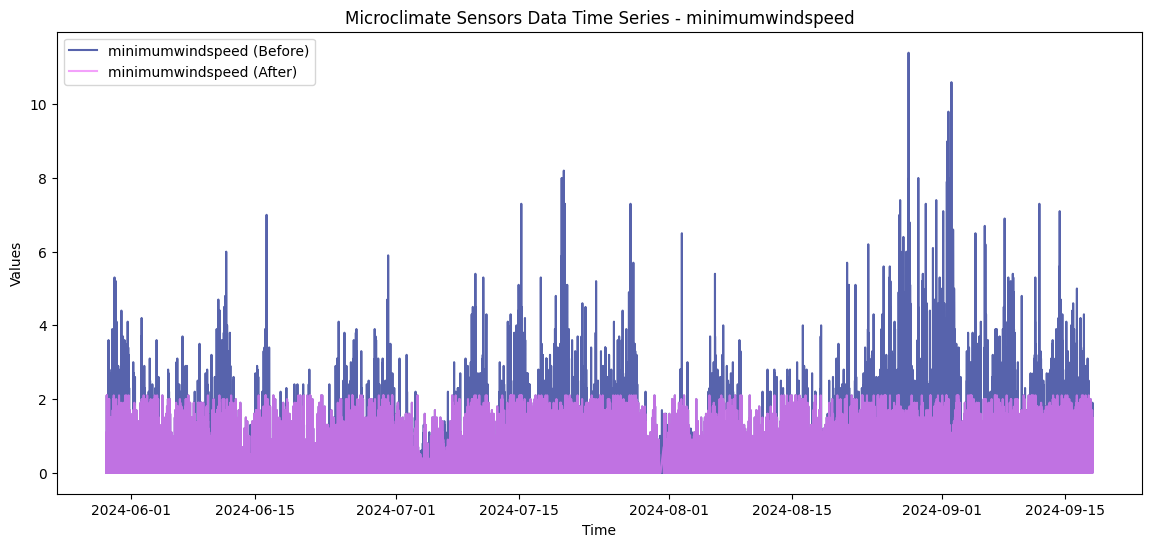

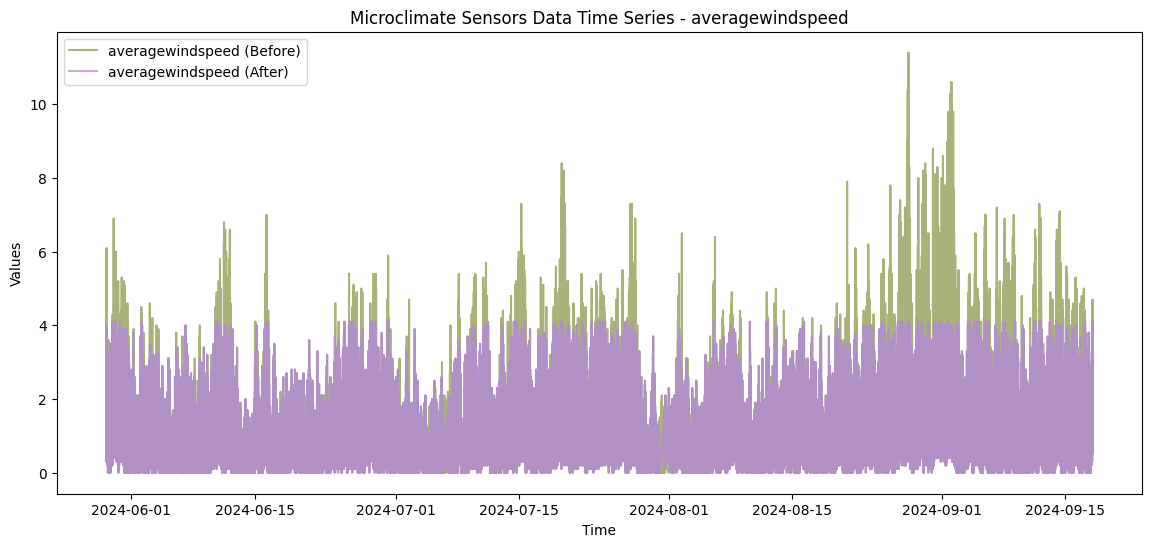

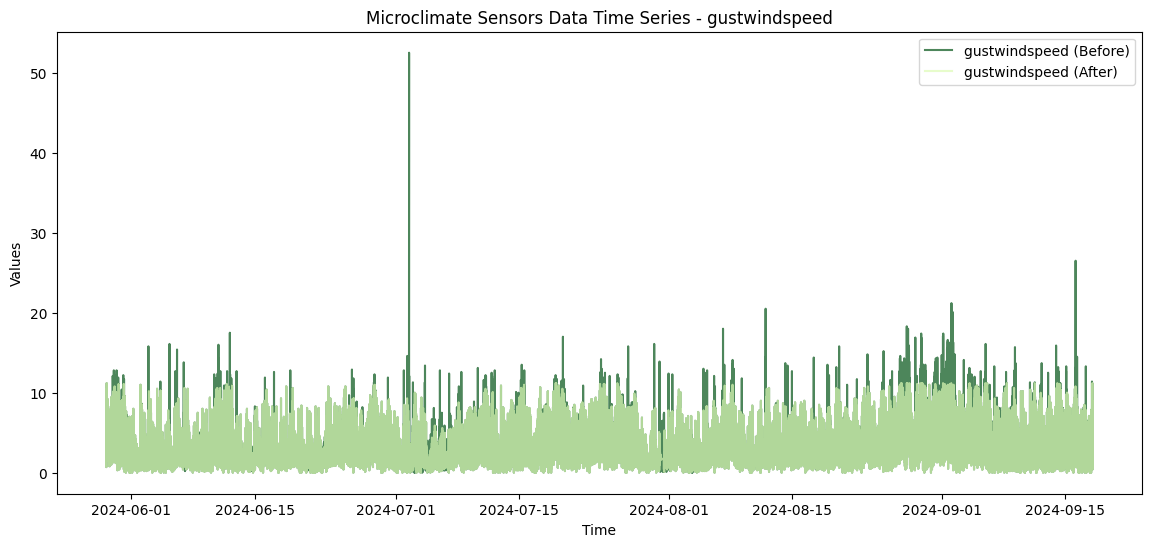

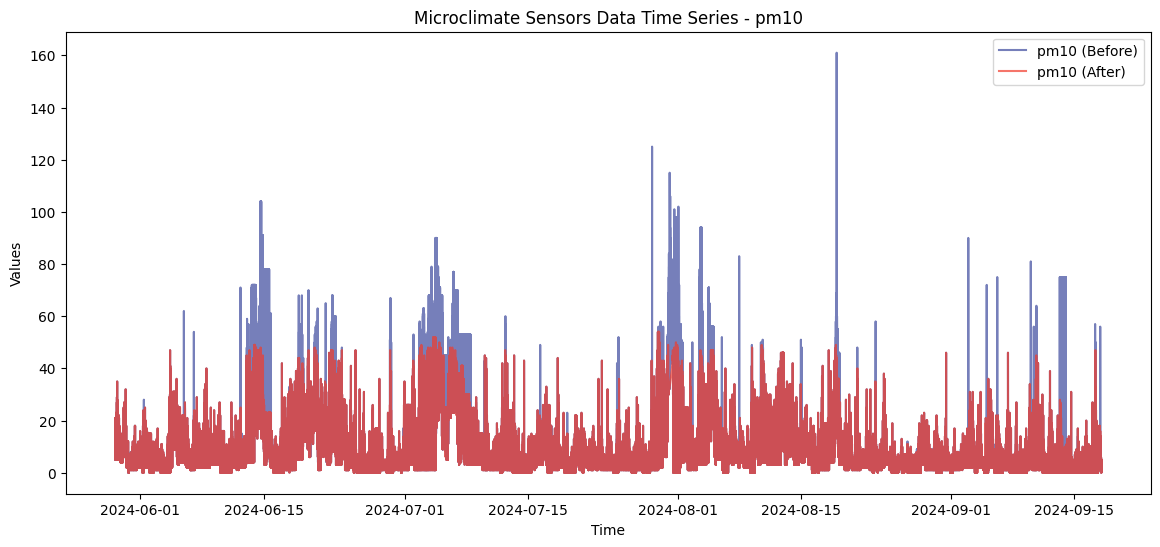

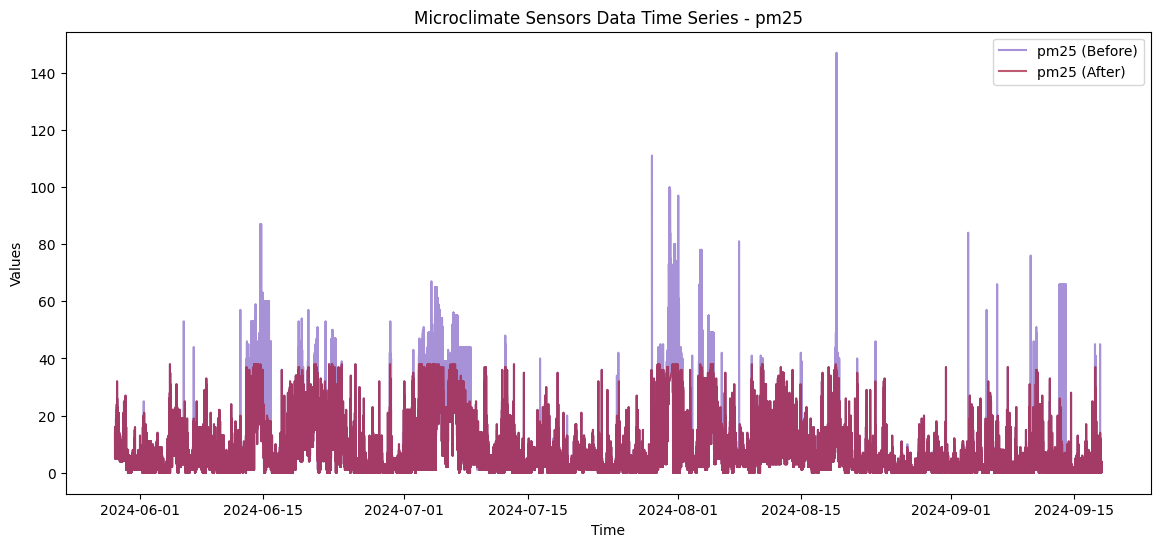

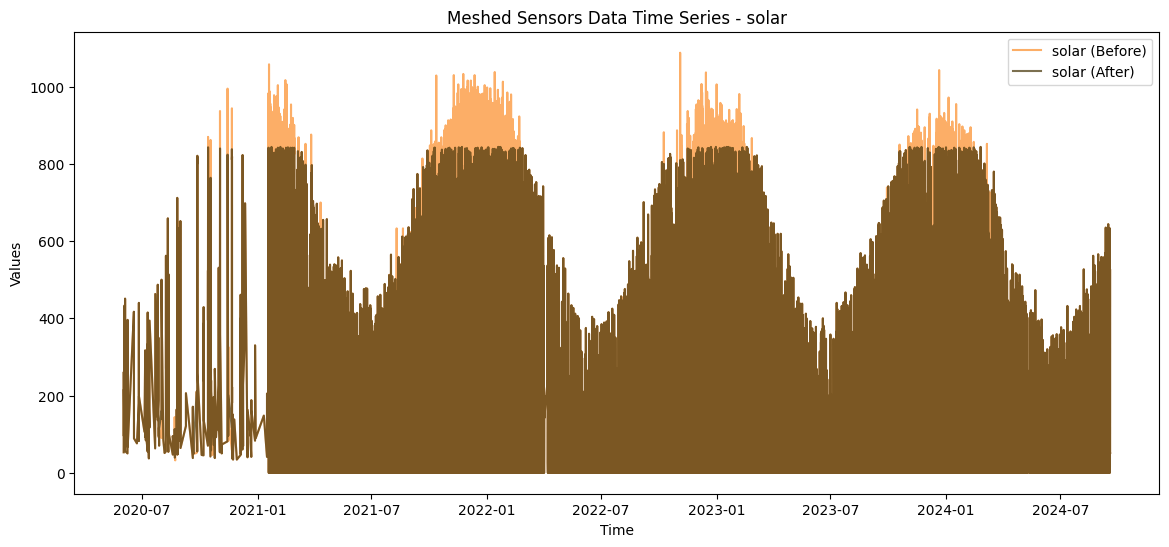

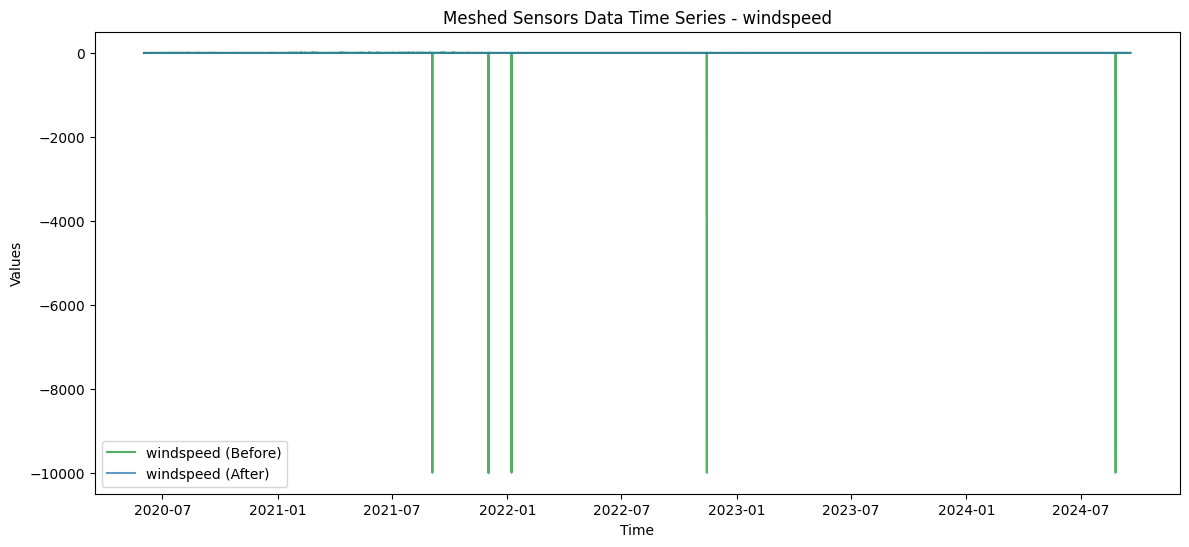

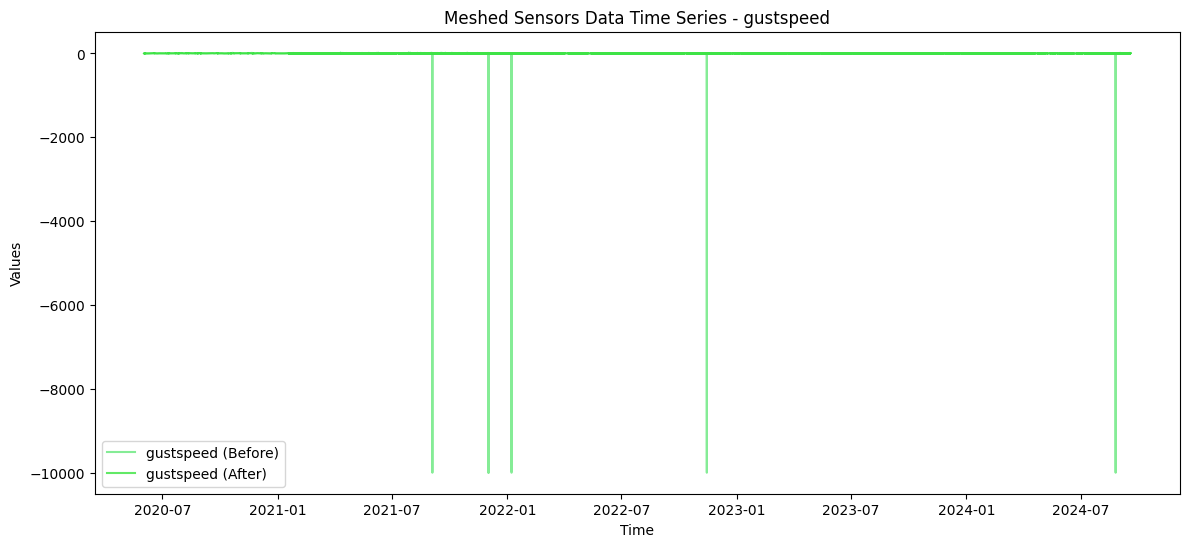

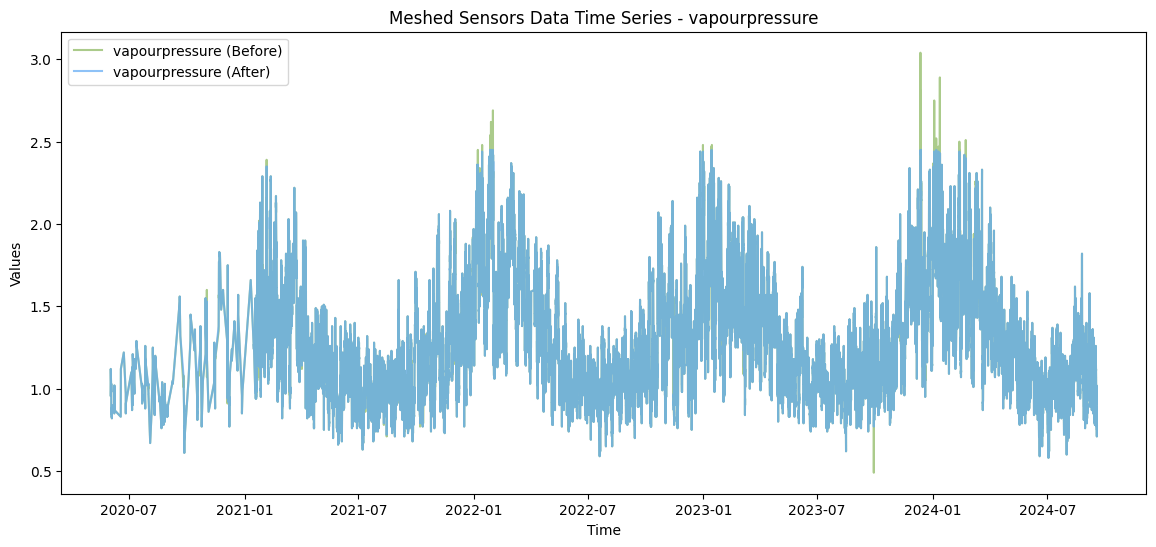

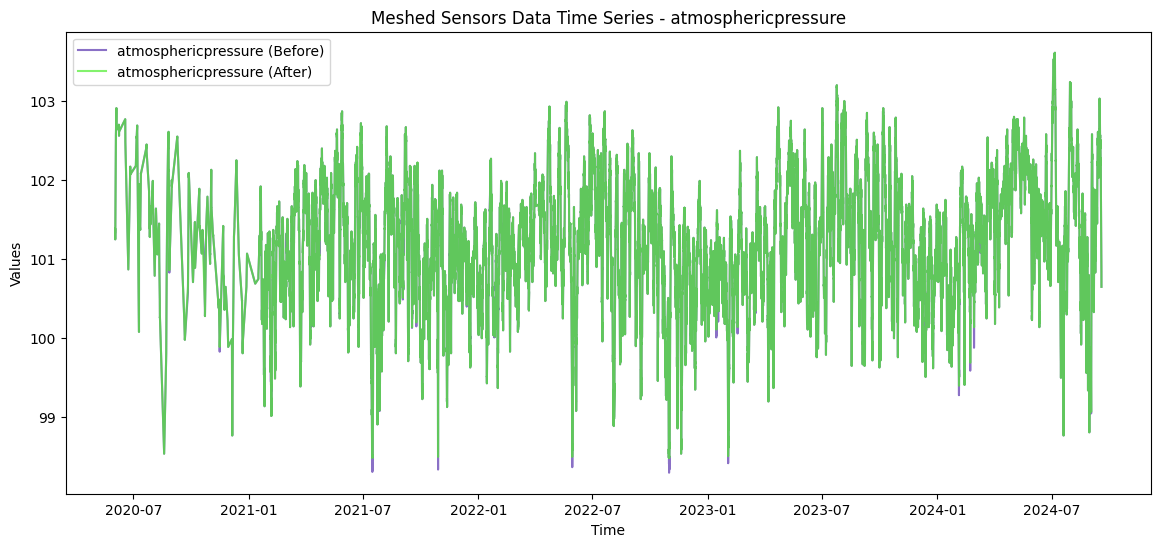

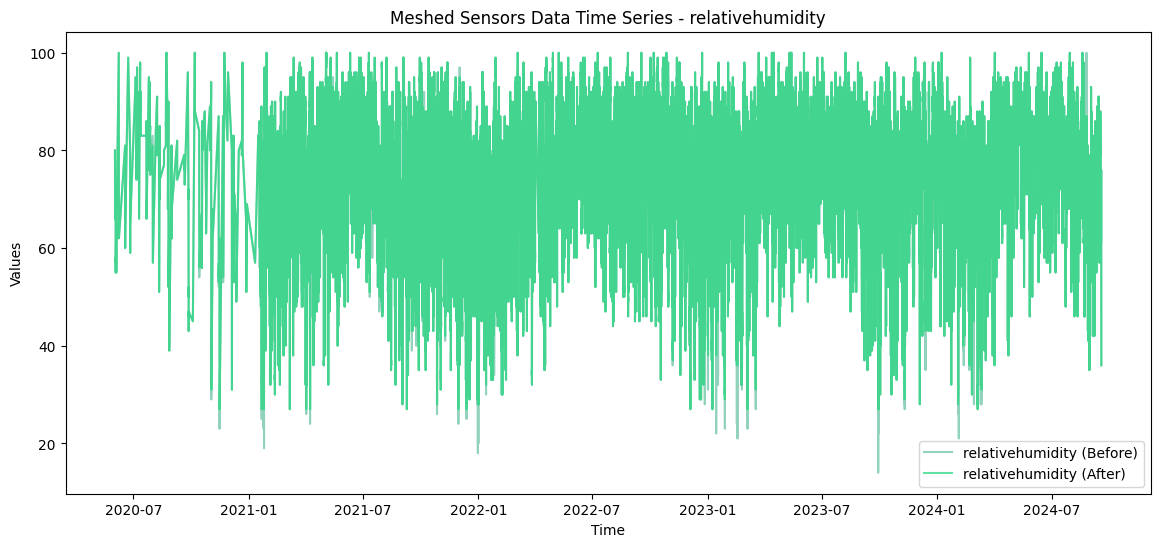

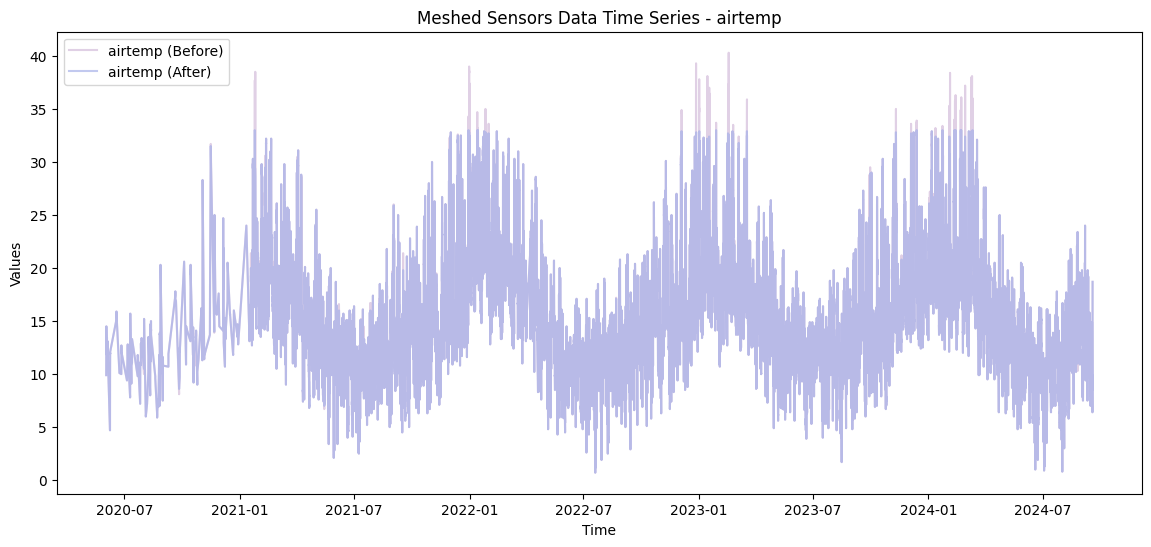

In [ ]:
def plot_columns_before_after(original_data, wrangled_data, columns, x_column, title_prefix, xlabel):
  for column in columns:
    original_color = (np.random.random(), np.random.random(), np.random.random())
    wrangled_color = (np.random.random(), np.random.random(), np.random.random())
    plt.figure(figsize=(14, 6))

    # Plot original data
    plt.plot(original_data[x_column], original_data[column], label=f'{column} (Before)', alpha=0.7, color=original_color)

    # Plot wrangled data
    plt.plot(wrangled_data[x_column], wrangled_data[column], label=f'{column} (After)', alpha=0.7, color=wrangled_color)

    plt.title(f'{title_prefix} Time Series - {column}')
    plt.xlabel(xlabel)
    plt.ylabel('Values')
    plt.legend()
    plt.show()

plot_columns_before_after(
    microclimate_sensors_data,  # Original data
    wrangled_microclimate_sensors_data,  # Wrangled data
    columns_to_check_microclimate_sensors_data,
    'received_at',
    'Microclimate Sensors Data',
    'Time'
)

plot_columns_before_after(
    meshed_sensor_type_1,  # Original data
    wrangled_meshed_sensor_type_1,  # Wrangled data
    columns_to_check_meshed_sensor_type_1,
    'time',
    'Meshed Sensors Data',
    'Time'
)

#### Merging Datasets

##### Creating a new dataset for windmills by combining two dataset

In [ ]:
# Creating unified datetime column for the new dataset
wrangled_microclimate_sensors_data['datetime'] = wrangled_microclimate_sensors_data['received_at']
wrangled_meshed_sensor_type_1['datetime'] = wrangled_meshed_sensor_type_1['time']

# Making coordinates usable for the map
wrangled_microclimate_sensors_data[['latitude', 'longitude']] = wrangled_microclimate_sensors_data['latlong'].str.split(',', expand=True)
wrangled_meshed_sensor_type_1[['latitude', 'longitude']] = wrangled_meshed_sensor_type_1['lat_long'].str.split(',', expand=True)


# Converting latitude and longitude to numeric values
wrangled_microclimate_sensors_data['latitude'] = pd.to_numeric(wrangled_microclimate_sensors_data['latitude'], errors='coerce')
wrangled_microclimate_sensors_data['longitude'] = pd.to_numeric(wrangled_microclimate_sensors_data['longitude'], errors='coerce')
wrangled_meshed_sensor_type_1['latitude'] = pd.to_numeric(wrangled_meshed_sensor_type_1['latitude'], errors='coerce')
wrangled_meshed_sensor_type_1['longitude'] = pd.to_numeric(wrangled_meshed_sensor_type_1['longitude'], errors='coerce')

# Concat the two datasets
melbourne_wind_dataset = pd.concat([wrangled_microclimate_sensors_data, wrangled_meshed_sensor_type_1], ignore_index=True)

# Combining columns
melbourne_wind_dataset['sensor'] = melbourne_wind_dataset['sensorlocation'].combine_first(melbourne_wind_dataset['sensor_name'])
melbourne_wind_dataset['wind_direction'] = melbourne_wind_dataset['winddirection'].combine_first(melbourne_wind_dataset['averagewinddirection'])
melbourne_wind_dataset['wind_speed'] = melbourne_wind_dataset['averagewindspeed'].combine_first(melbourne_wind_dataset['windspeed'])
melbourne_wind_dataset['gust_wind_speed'] = melbourne_wind_dataset['gustwindspeed'].combine_first(melbourne_wind_dataset['gustspeed'])
melbourne_wind_dataset['temperature'] = melbourne_wind_dataset['airtemperature'].combine_first(melbourne_wind_dataset['airtemp'])

# Dropping unnecessary
melbourne_wind_dataset = melbourne_wind_dataset.drop(columns=[
    'averagewindspeed', 'windspeed',
    'gustwindspeed', 'gustspeed', 'minimumwindspeed',
    'airtemperature', 'airtemp', 'sensor_name', 'sensorlocation',
    'latlong', 'lat_long', 'device_id', 'dev_id', 'rtc',
    'pm25', 'pm10', 'command', 'solar', 'battery', 'strikes',
    'vapourpressure', 'winddirection', 'averagewinddirection',
    'precipitation', 'solarpanel', 'received_at', 'time'
])

melbourne_wind_dataset = melbourne_wind_dataset.sort_values(by='datetime')

melbourne_wind_dataset.head()

,relativehumidity,atmosphericpressure,hour,day,month,datetime,latitude,longitude,sensor,wind_direction,wind_speed,gust_wind_speed,temperature
72029,80.0,101.34,22,1,6,2020-06-01 22:44:49+00:00,-37.802214,144.965626,Weather Station,288.4,0.83,2.58,9.9
72030,78.0,101.37,23,1,6,2020-06-01 23:05:57+00:00,-37.802214,144.965626,Weather Station,265.9,1.29,3.05,10.4
72031,78.0,101.38,23,1,6,2020-06-01 23:20:33+00:00,-37.802214,144.965626,Weather Station,263.5,1.10,3.27,10.6
72032,77.0,101.38,23,1,6,2020-06-01 23:35:19+00:00,-37.802214,144.965626,Weather Station,262.3,1.52,3.94,10.9
72033,76.0,101.38,23,1,6,2020-06-01 23:50:34+00:00,-37.802214,144.965626,Weather Station,268.6,1.48,5.32,11.3


# Analysis

#### Wind speed analysis: Top places to have windmills for the best efficiency.

In [ ]:
# Average wind speeds by coordinates (gust_wind_speed, sensor, and wind_direction added later)
avg_wind_speed_by_coordinates = melbourne_wind_dataset.groupby(['latitude', 'longitude']).agg({
    'wind_speed': 'mean',
    'gust_wind_speed': 'mean',
    'sensor': 'first',
    'wind_direction': 'mean'
}).reset_index()

# Min-Max scaling wind speed values for heatmap
scaler = MinMaxScaler()
avg_wind_speed_by_coordinates['wind_speed_scaled'] = scaler.fit_transform(avg_wind_speed_by_coordinates[['wind_speed']])


In [ ]:
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=15)

# Preparing data for the HeatMap
heat_data = [
    [row['latitude'], row['longitude'], row['wind_speed_scaled']]
    for index, row in avg_wind_speed_by_coordinates.iterrows()
]

# Addint heatmap to the map
HeatMap(heat_data, gradient={0: 'blue', 1: 'red'}, radius=15, blur=10, max_zoom=1).add_to(melbourne_map)

# Sorting the data by wind speed in descending order and get the top N averages
N = 10  # N top values to show
top_avg_wind_speed = avg_wind_speed_by_coordinates.sort_values(by='wind_speed', ascending=False).head(N)

# Adding markers for the top N average wind speeds with numbered pins
for rank, (index, row) in enumerate(top_avg_wind_speed.iterrows(), start=1):
  folium.Marker(
      location=[row['latitude'], row['longitude']],
      popup=(
          f"Rank: {rank}\n"
          f"Sensor: {row['sensor']}\n"
          f"Average Wind Speed: {row['wind_speed']:.2f} m/s\n"
          f"Average Gust Wind Speed: {row['gust_wind_speed']:.2f} m/s\n"
          f"Average Wind Direction: {row['wind_direction']:.2f}°"
      ),
      icon=folium.DivIcon(html=f"""<div style="font-size: 18px; color: black;">{rank}</div>""")
  ).add_to(melbourne_map)

melbourne_map

In [ ]:
print(top_avg_wind_speed['sensor'])

7                           101 Collins St L11 Rooftop
4    Tram Stop 7B - Melbourne Tennis Centre Precinc...
8                                          CH1 rooftop
6    Swanston St - Tram Stop 13 adjacent Federation...
9                                      Weather Station
0    SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...
2                                          Batman Park
1    Tram Stop 7C - Melbourne Tennis Centre Precinc...
3                   Enterprize Park - Pole ID: COM1667
5                      Birrarung Marr Park - Pole 1131
Name: sensor, dtype: object


#### Solar power analysis: Top places to have solar panels for the best efficiency.

In [ ]:
# Min-max scaling the required values for the heatmap
wrangled_microclimate_sensors_data['pm10_scaled'] = scaler.fit_transform(wrangled_microclimate_sensors_data[['pm10']])
wrangled_microclimate_sensors_data['pm25_scaled'] = scaler.fit_transform(wrangled_microclimate_sensors_data[['pm25']])
wrangled_microclimate_sensors_data['relativehumidity_scaled'] = scaler.fit_transform(wrangled_microclimate_sensors_data[['relativehumidity']])
wrangled_microclimate_sensors_data['solar_score'] = wrangled_microclimate_sensors_data['pm10_scaled'] + wrangled_microclimate_sensors_data['pm25_scaled'] + wrangled_microclimate_sensors_data['relativehumidity_scaled']

# Groupping by location and calculation of the mean of PM10, PM25, and relative humidity
aggregated_solar_data = wrangled_microclimate_sensors_data.groupby(['latitude', 'longitude']).agg({
    'pm10': 'mean',
    'pm25': 'mean',
    'relativehumidity': 'mean',
    'pm10_scaled': 'mean',
    'pm25_scaled': 'mean',
    'relativehumidity_scaled': 'mean',
    'solar_score': 'mean',
    'sensorlocation' : 'first'
}).reset_index()

top_solar_locations = aggregated_solar_data.sort_values(by=['solar_score'])

In [ ]:
# Preparing data for the Solar HeatMap
heat_data = [
    [row['latitude'], row['longitude'], row['solar_score']]
    for index, row in top_solar_locations.iterrows()
]

melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=15)

HeatMap(heat_data, gradient={0: 'blue', 1: 'red'}, radius=15, blur=10, max_zoom=1).add_to(melbourne_map)

N = 10  # Number of top locations to show
top_solar_locations = top_solar_locations.head(N)

for rank, (index, row) in enumerate(top_solar_locations.iterrows(), start=1):
  folium.Marker(
      location=[row['latitude'], row['longitude']],
      popup=(
          f"Rank: {rank}\n"
          f"Location: {row['sensorlocation']}\n"
          f"Average PM10: {row['pm10']:.2f} µg/m³\n"
          f"Average PM2.5: {row['pm25']:.2f} µg/m³\n"
          f"Relative Humidity: {row['relativehumidity']:.2f}%"
      ),
      icon=folium.DivIcon(html=f"""<div style="font-size: 18px; color: black;">{rank}</div>""")
  ).add_to(melbourne_map)

melbourne_map

In [ ]:
print(top_solar_locations['sensorlocation'])

2                                          Batman Park
0    SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...
4    Tram Stop 7B - Melbourne Tennis Centre Precinc...
3                   Enterprize Park - Pole ID: COM1667
6    Swanston St - Tram Stop 13 adjacent Federation...
1    Tram Stop 7C - Melbourne Tennis Centre Precinc...
5                      Birrarung Marr Park - Pole 1131
8                                          CH1 rooftop
7                           101 Collins St L11 Rooftop
Name: sensorlocation, dtype: object


## Analysis Report:

### Wind Turbine Placement Analysis:

Two datasets have been combined to identify optimal locations for wind turbines. Sensor differences have been disregarded for the purposes of this project. The datasets used are as follows:
  1. Microclimate Sensors Data (https://data.melbourne.vic.gov.au/explore/dataset/microclimate-sensors-data/information/)
  2. Argyle Square weather stations (historical data) (https://data.melbourne.vic.gov.au/explore/dataset/meshed-sensor-type-1/information/)

Observations:
- The analysis of wind speed data reveals the following top 10 locations for wind turbines, ranked by average wind speed:
  1. 101 Collins St L11 Rooftop
  2. Tram Stop 7B - Melbourne Tennis Centre Precinct
  3. CH1 Rooftop
  4. Swanston St - Tram Stop 13 adjacent Federation Square
  5. Weather Station
  6. SkyFarm (Jeff's Shed) Rooftop - Melbourne Convention Center
  7. Batman Park
  8. Tram Stop 7C - Melbourne Tennis Centre Precinct
  9. Enterprize Park - Pole ID: COM1667
  10. Birrarung Marr Park - Pole 1131
- These locations are primarily open spaces, rooftops, and areas with minimal obstruction to airflow, ensuring that wind turbines can capture as much wind energy as possible.

### Solar Panel Placement Analysis:

The analysis focused on identifying optimal locations for solar panels by examining pollution and humidity data, which significantly affect the amount of sunlight reaching the panels. While one dataset contained solar power data for a single location, the other provided pollution and humidity data. Due to differences in data types, the datasets were not merged, and the dataset with pollution and humidity data was used for the analysis.

The ideation and feature selection stages were informed by insights from the study, "Investigation of Dust Pollutants and the Impact of Suspended Particulate Matter on the Performance of Photovoltaic Systems" (Tamoor et al., 2022). Additionally, humidity was considered a critical feature, as high humidity increases the likelihood of particles (PM10 and PM2.5) adhering to the solar panels, potentially reducing their effectiveness. Furthermore, higher humidity can also decrease the amount of solar radiation that reaches the panels, further affecting performance.

Observations:
- The analysis reveals the following top locations:
  1. Batman Park
  2. SkyFarm (Jeff's Shed) Rooftop - Melbourne Convention Center
  3. Tram Stop 7B - Melbourne Tennis Centre Precinct
  4. Enterprize Park - Pole ID: COM1667
  5. Swanston St - Tram Stop 13 adjacent Federation Square
  6. Tram Stop 7C - Melbourne Tennis Centre Precinct
  7. Birrarung Marr Park - Pole 1131
  8. CH1 Rooftop
  9. 101 Collins St L11 Rooftop
- These locations are identified as optimal for solar panels because of lower particulate matter concentration and moderate humidity levels, ensuring efficient solar energy production.

### References:

- Tamoor, M., Hussain, M.I., Bhatti, A.R., Miran, S., Arif, W., Kiren, T. and Lee, G.H. (2022). Investigation of dust pollutants and the impact of suspended particulate matter on the performance of photovoltaic systems. Frontiers in Energy Research, 10. doi:https://doi.org/10.3389/fenrg.2022.1017293.